# Anomaly

Anomaly accepts a pandas DateTimeIndexed series with one day per row, and detects outliers in the data.



In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
%matplotlib inline

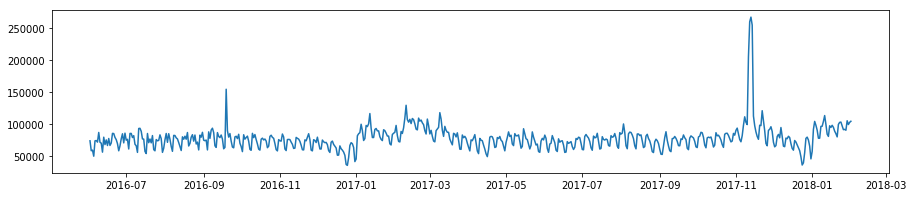

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('../data/test.csv', squeeze=True, index_col=0, parse_dates=True)
fig = plt.figure(figsize=(15, 3))
plt.plot(series.index, series.values)

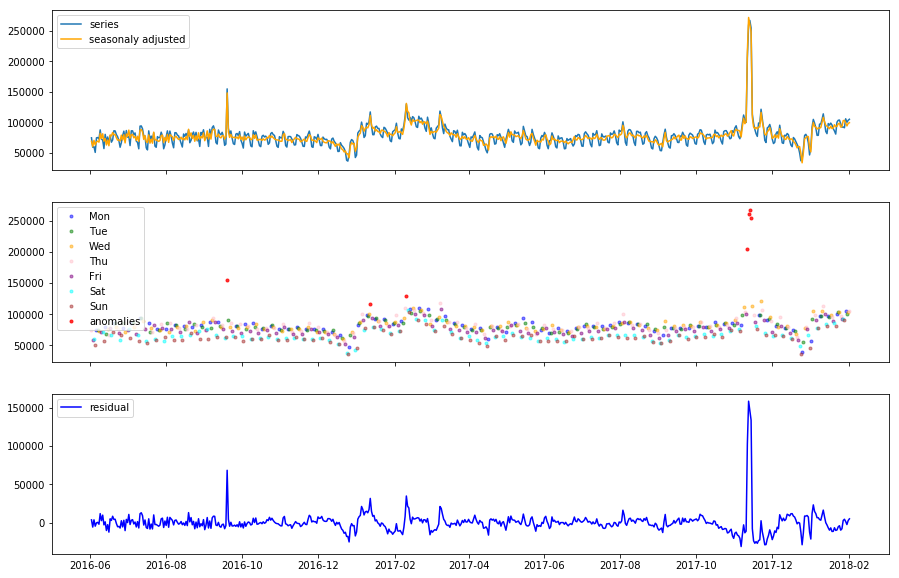

In [7]:
import anomaly

detector = anomaly.AnomalyDetector(series)
detector.fit()
detector.plot()

In [4]:
detector.indices

array([528, 529, 530, 527, 109, 253, 224], dtype=int64)

## Installation

    pip install git+https://github.com/dan-global/anomaly.git

## Methodology

Most of the KPIs related to web analytics have a strong weekly pattern, and outlier detection will depend on first extracting the weekly seasonality. This is acheived with the python library seasonal https://github.com/welch/seasonal.

When the weekly seasonal data is removed from the signal, the overall trend is also removed and only the residual is left. The outlier detection is then done on the residual signal.

Outlier detection is acheived with the Smirnov-Grubbs test using the outlier library https://github.com/c-data/outlier-utils

There are two other options for outlier detection, z_score and robust_std.

## Further Usage

If there is further seasonality in the data, for example yearly, the adjusted series can be run through again using a different detection period to further deseasonalise the data. 

In [ ]:
new_series = detector.adjusted

detector = anomaly.AnomalyDetector(new_series)
detector.fit(period=365)

### Preprocessing Detrending

The data can also be de-trended using a linear regression or a rolling median average before fitting

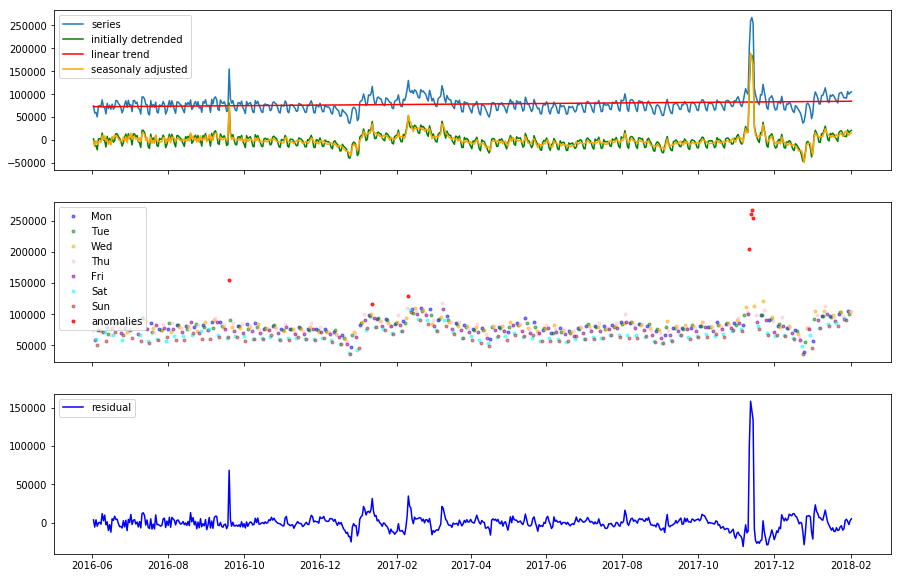

In [5]:
detector.detrend(how='linear')
detector.fit()
detector.plot()

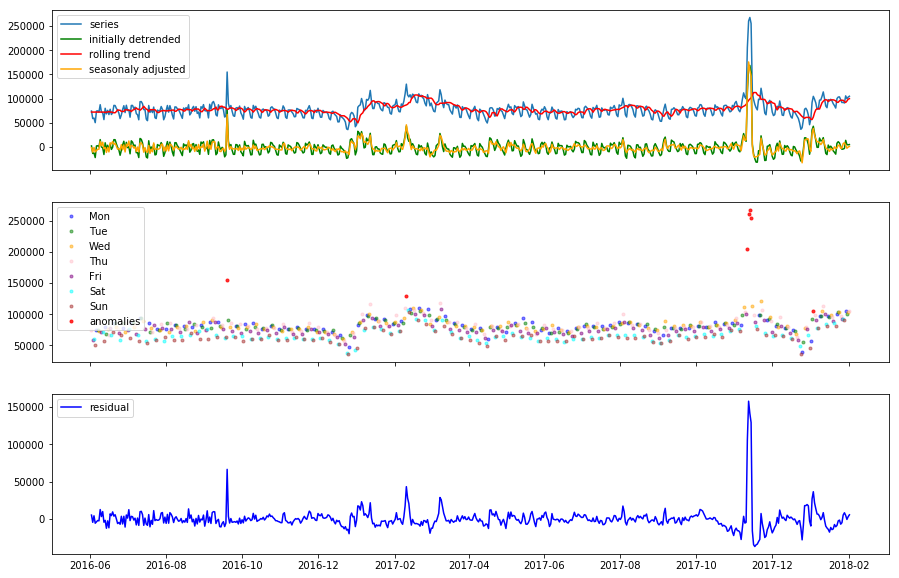

In [8]:
detector.detrend(how='rolling')
detector.fit()
detector.plot()

## Helper function

There is a helper function to apply the default detection to a series using pandas.Series.transform

In [9]:
from anomaly import detect_anomalies

series.transform(detect_anomalies)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,